In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import csv
from IPython.display import display 
from fuzzywuzzy import fuzz, process
import datetime
from dateutil.relativedelta import relativedelta     
%matplotlib inline

In [2]:
#Load CSV and remove redundant columns 
df = pd.read_csv('Movies - Cleaned.csv', index_col=False)
df = df.drop(['Description', 'index', 'URL'], axis = 1)
df.describe()

,Year,IMDb Rating,Runtime (mins),Num Votes,Order
count,854.000000,847.000000,847.000000,8.470000e+02,866.00000
mean,2001.932084,6.375089,107.295159,2.126588e+05,2.15358
std,11.781722,1.130652,18.816402,2.543826e+05,1.63932
min,1942.000000,2.000000,70.000000,8.240000e+02,1.00000
25%,1994.000000,5.700000,94.000000,4.870850e+04,1.00000
50%,2004.000000,6.500000,104.000000,1.209190e+05,2.00000
75%,2011.000000,7.200000,118.000000,2.710940e+05,3.00000
max,2022.000000,9.200000,202.000000,2.220190e+06,14.00000


In [3]:
#Clearn all data to avoid Nonetype object
df = df.dropna()
null_counts = df.isnull().sum()
infinite_counts = df.isin([np.inf, -np.inf]).sum()

In [4]:
df.describe()

,Year,IMDb Rating,Runtime (mins),Num Votes,Order
count,847.000000,847.000000,847.000000,8.470000e+02,847.000000
mean,2001.775679,6.375089,107.295159,2.126588e+05,2.153483
std,11.703154,1.130652,18.816402,2.543826e+05,1.628661
min,1942.000000,2.000000,70.000000,8.240000e+02,1.000000
25%,1994.000000,5.700000,94.000000,4.870850e+04,1.000000
50%,2004.000000,6.500000,104.000000,1.209190e+05,2.000000
75%,2011.000000,7.200000,118.000000,2.710940e+05,3.000000
max,2020.000000,9.200000,202.000000,2.220190e+06,14.000000


In [5]:
df['IMDb Rating diff'] = df.groupby('Movie Series')['IMDb Rating'].apply(lambda x: x - x.iloc[0])
df

,Title,Release Date,Year,IMDb Rating,Runtime (mins),Genres,Num Votes,Directors,Movie Series,Order,IMDb Rating diff
0,101 Dalmatians,18-11-1996,1996.0,5.7,103.0,"Adventure, Comedy, Crime, Family",98439.0,Stephen Herek,101 Dalmatians,1,0.0
1,102 Dalmatians,22-11-2000,2000.0,4.9,100.0,"Adventure, Comedy, Family",33823.0,Kevin Lima,101 Dalmatians,2,-0.8
2,12 Rounds,19-03-2009,2009.0,5.6,108.0,"Action, Crime, Thriller",26828.0,Renny Harlin,12 Rounds,1,0.0
3,12 Rounds 2: Reloaded,04-06-2013,2013.0,5.3,95.0,"Action, Adventure, Thriller",5141.0,Roel Reiné,12 Rounds,2,-0.3
4,21 Jump Street,12-03-2012,2012.0,7.2,109.0,"Action, Comedy, Crime",498876.0,"Christopher Miller, Phil Lord",21 Jump Street,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
861,[Rec]²,02-09-2009,2009.0,6.5,85.0,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",67100.0,"Jaume Balagueró, Paco Plaza",[Rec],2,-0.9
862,[Rec]³: Génesis,09-03-2012,2012.0,5.0,80.0,"Action, Comedy, Horror, Romance, Sci-Fi, Thriller",32388.0,Paco Plaza,[Rec],3,-2.4
863,[REC] 4: Apocalipsis,09-09-2014,2014.0,5.3,95.0,"Action, Adventure, Fantasy, Horror, Sci-Fi, Th...",15599.0,Jaume Balagueró,[Rec],4,-2.1
864,xXx,09-08-2002,2002.0,5.9,124.0,"Action, Adventure, Thriller",170874.0,Rob Cohen,xXx,1,0.0


In [33]:
better = df[(df['Order'] > 1) & (df['IMDb Rating diff'] > 0)].shape[0]

total = df[df['Order'] > 1].shape[0]
prob = better / total
print(f"The probability of a sequel being better than its original is {prob:.2f}")

The probability of a sequel being better than its original is 0.13


In [42]:
df['IMDb Rating diff'].describe()


<bound method NDFrame._add_numeric_operations.<locals>.min of 0      0.0
1     -0.8
2      0.0
3     -0.3
4      0.0
      ... 
861   -0.9
862   -2.4
863   -2.1
864    0.0
865   -1.5
Name: IMDb Rating diff, Length: 847, dtype: float64>

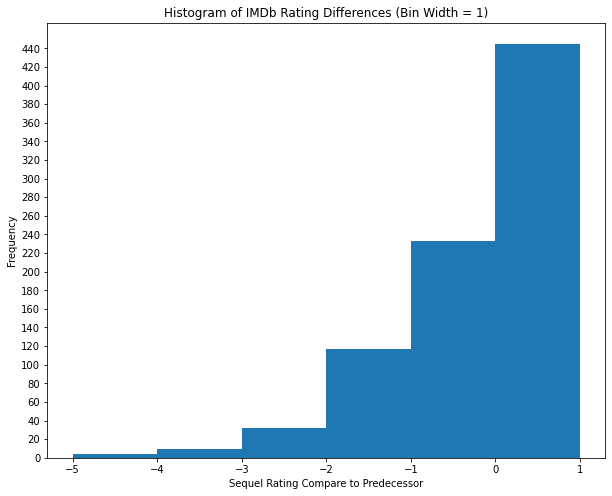

In [26]:
import matplotlib.pyplot as plt


imdb_diff = df['IMDb Rating diff']
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(imdb_diff, bins=range(-5, 2), width=1)
ax.set_xlabel('Sequel Rating Compare to Predecessor')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of IMDb Rating Differences (Bin Width = 1)')
ax.set_yticks(range(0, 460, 20))
plt.show()

In [8]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
df.to_csv('folder/subfolder/Films_probability.csv')  